**Impoting Libraries**

In [32]:
import pandas as pd 
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the datasets**

In [33]:
data = pd.read_csv('/content/Youtube05-Shakira.csv')


In [34]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [35]:
data.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
365,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,0
366,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
367,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
368,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
369,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  370 non-null    object
 1   AUTHOR      370 non-null    object
 2   DATE        370 non-null    object
 3   CONTENT     370 non-null    object
 4   CLASS       370 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 14.6+ KB


In [37]:
data.shape

(370, 5)

In [39]:
data['CLASS'].value_counts()

0    196
1    174
Name: CLASS, dtype: int64

0    196
1    174
Name: CLASS, dtype: int64

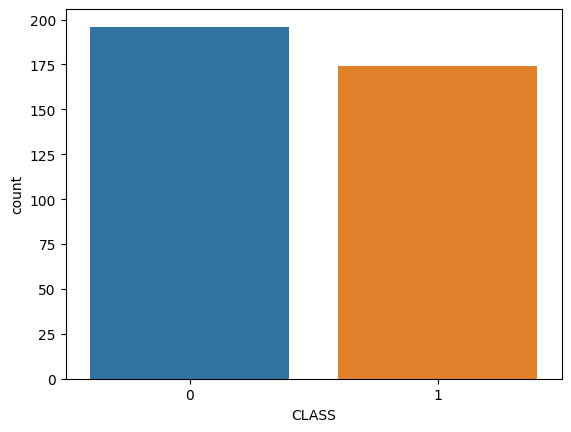

In [40]:
sns.countplot(data=data, x="CLASS")
data.CLASS.value_counts()

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.CONTENT,data.CLASS,test_size=0.2,random_state=42)

X_train.head()

y_train.head()



345    1
192    1
75     0
84     0
358    1
Name: CLASS, dtype: int64

**tokenization**

In [42]:
def tokenization(data):
    tokens = word_tokenize(data)
    return tokens

import nltk
nltk.download("all")

x_train_token = X_train.apply(tokenization)
x_test_token =X_test.apply(tokenization)

x_train_token.head()

x_test_token.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

327    [Hey, youtubers, ..., I, really, appreciate, a...
33                                           [BEAUTIFUL]
15     [Every, time, I, hear, this, song, ,, I, think...
314    [Hello, everyone, :, ), I, know, most, of, you...
57     [Subscribe, me, please, ., i, &, #, 39, ;, ll,...
Name: CONTENT, dtype: object

 Remove Punctuation

In [43]:
def remove_punctuation(data):
    clean_text = [x for x in data if x.isalpha()]
    return clean_text

x_train_without_punt = x_train_token.apply(remove_punctuation)
x_test_without_punt = x_test_token.apply(remove_punctuation)

x_train_without_punt.head()

345    [Nice, to, meet, You, this, is, Johnny, If, Yo...
192    [Stop, Wasting, Up, Your, Time, and, Get, Paid...
75                                           [Your, the]
84                                                    []
358    [Hey, Music, Fans, I, really, appreciate, all,...
Name: CONTENT, dtype: object

**Normalization**

In [44]:
def normalization(data):
    lower = [x.lower() for x in data]
    return lower

x_train_normal = x_train_without_punt.apply(normalization)
x_test_normal = x_test_without_punt.apply(normalization)

x_train_normal.head()

345    [nice, to, meet, you, this, is, johnny, if, yo...
192    [stop, wasting, up, your, time, and, get, paid...
75                                           [your, the]
84                                                    []
358    [hey, music, fans, i, really, appreciate, all,...
Name: CONTENT, dtype: object

**Stopwaords Removal**

In [45]:
domain_stop_w = ["youtubers", 'every', 'subscribe','voice']
def stopwords_remove(data):
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    clean_text = [x for x in data if x not in stop and x not in domain_stop_w]
    return clean_text

x_train1= x_train_normal.apply(stopwords_remove)
x_test1= x_test_normal.apply(stopwords_remove)

x_train1.head()

x_test1.head()


327    [hey, really, appreciate, took, time, read, ye...
33                                           [beautiful]
15     [time, hear, song, think, iniesta, goal, nethe...
314    [hello, everyone, know, probably, pass, kind, ...
57                                [please, promise, sub]
Name: CONTENT, dtype: object

**Lemitazation**

In [46]:
def lemmatization(data):
    from nltk.stem import WordNetLemmatizer
    lemma = WordNetLemmatizer()
    l1 = []
    for i in data :
        text1 = lemma.lemmatize(i)
        l1.append(text1)
    return l1

final_train = x_train1.apply(lemmatization)
final_test = x_test1.apply(lemmatization)

final_train.head()

final_test.head()

327    [hey, really, appreciate, took, time, read, ye...
33                                           [beautiful]
15     [time, hear, song, think, iniesta, goal, nethe...
314    [hello, everyone, know, probably, pas, kind, c...
57                                [please, promise, sub]
Name: CONTENT, dtype: object

 World Cloud

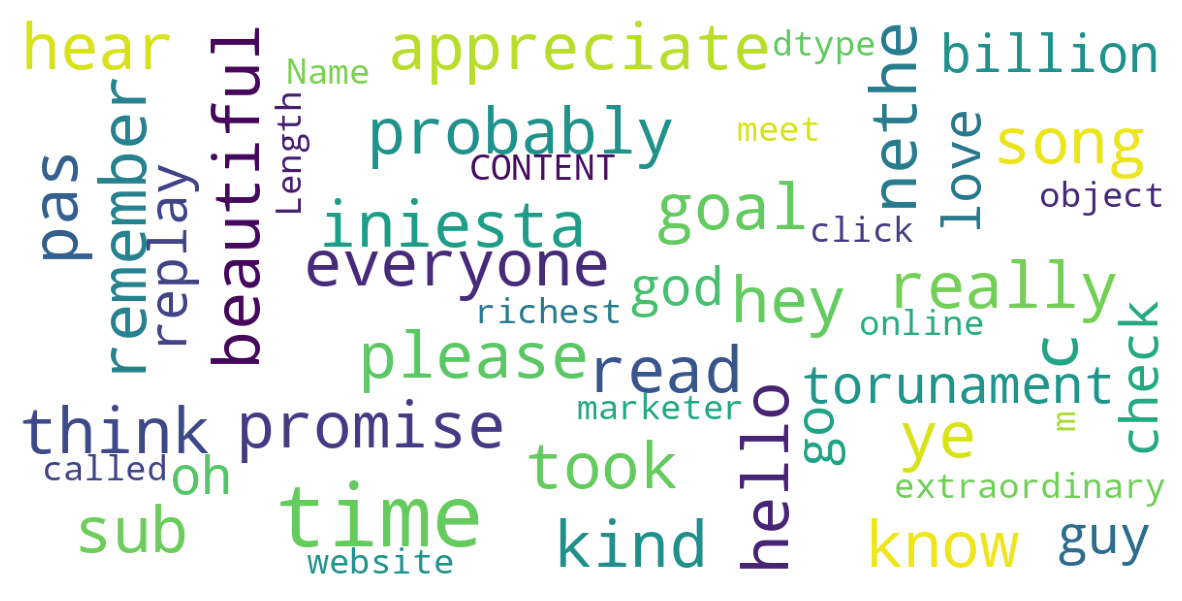

In [47]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud= WordCloud(background_color='white',stopwords=stopwords,max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1,figsize=(15,15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(final_test)

In [48]:
def join_list(data):
    text = " ".join(data)
    return text

final_text_train = final_train.apply(join_list)
final_text_test = final_test.apply(join_list)

final_text_train

final_text_test

327    hey really appreciate took time read year old ...
33                                             beautiful
15         time hear song think iniesta goal netherlands
314    hello everyone know probably pas kind comment ...
57                                    please promise sub
                             ...                        
82                              remember torunament like
94                         oh god go billion replay love
195    guy check extraordinary website called make mo...
311                                                     
292                   meet richest online marketer click
Name: CONTENT, Length: 74, dtype: object

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',max_df=0.95,max_features=1200)
count_train = cv.fit_transform(final_text_train)
count_test = cv.transform(final_text_test)

df = pd.DataFrame(count_train.A)

df.head()

df.shape

(296, 819)

Model Building
Naive Bayes - MultinomialNB 

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

mnb_model = MultinomialNB()
mnb_model.fit(count_train.A,y_train)
pred_mnb = mnb_model.predict(count_test.A)

pred_mnb

report = classification_report(y_test,pred_mnb)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        41
           1       0.97      0.85      0.90        33

    accuracy                           0.92        74
   macro avg       0.93      0.91      0.92        74
weighted avg       0.92      0.92      0.92        74

